In [ ]:
import numpy as np

In [ ]:
class KMeans():
  def __init__(self,n_clusters, n_iterations = None, minimum_change = 1e-6):
    self.n_clusters = n_clusters
    self.n_interations = n_iterations
    self.minimum_change = minimum_change

  def fit(self,X, y):
    self.X = X
    self.y = y
    n, X_dim = X.shape
    self.centroids = self.kmeans_init(self.n_clusters, X)

    prev_loss = 9999999
    while True:
      self.clusters = [[] for k in range(self.n_clusters)]
      for x in self.X:
        chosen_clusters = -1
        min_distance = 9999999
        for k in range(self.n_clusters):
          distance_x_centroid = np.sum((x - self.centroids[k]) ** 2)
          if distance_x_centroid < min_distance:
            chosen_clusters = k
            min_distance = distance_x_centroid
        self.clusters[chosen_clusters].append(x)


      # recompute the centroids:
      for k in range(self.n_clusters):
        self.centroids[k] = sum(self.clusters[k]) / len(self.clusters[k])

      # compute loss:
      current_loss = self.loss()
      if prev_loss - current_loss < self.minimum_change:
        break
      prev_loss = current_loss




  def kmeans_init(self,n_cluster, X):
    centroids = []
    #1. Select the randomly point from the dataset X
    centroids.append(X[np.random.randint(0,X.shape[0]), :])

    #2. Choose k-1 remaining clusters
    for k in range(n_cluster-1):
      #compute the distance from each point in dataset to the pre-defined centroids
      #and choose the minimum distance of each point to the sets of pre-defined centroids:
      dist = []
      for x in X:
        d = 1e10
        for c in centroids:
          distance_c_x = np.sum((x - c) ** 2)
          if distance_c_x < d:
            d = distance_c_x
        # append minimum distance into dist:
        dist.append(d)

      # choose the point with maximum distance in the set of minimum distance to the set of centroids as the next centroid:
      centroids.append(X[np.argmax(dist), :])

    return np.array(centroids)


  def loss(self):
    error = 0
    for k in range(self.n_clusters):
      for x in self.clusters:
        error += np.sum((x - self.centroids[k]) ** 2)

    return error/self.X.shape[0]

  def predict(self,X):
    result = []
    for x in X:
      d = 1e10
      chosen_c = -1
      for k in range(self.n_clusters):
        distance = np.sum((x-self.centroids[k]) ** 2)
        if distance < d:
          d = distance
          chosen_c = k
      result.append(chosen_c)

    return result


In [ ]:
centers = [[-1,-1], [1,1], [1,-1]]

In [ ]:
from sklearn.datasets import make_blobs
X, y, centers = make_blobs(n_samples=1000, centers=centers , n_features=2,
                random_state=0,return_centers=True, cluster_std = 0.6)

In [ ]:
kmeans = KMeans(n_clusters = 5)

In [ ]:
kmeans.fit(X,y)

In [ ]:
centroids = kmeans.kmeans_init(3,X)
# prediction = kmeans.predict(X)

In [ ]:
prediction

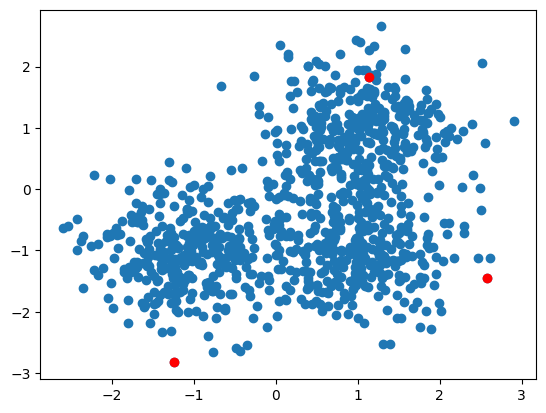

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.scatter(centroids[:,0], centroids[:,1], c = "red")